In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [3]:
data= pd.read_csv('pelit_hr_data - Sheet2.csv')
df=data.copy()

In [4]:
df.shape

(2845, 9)

In [5]:
df.isnull().any()

turnover         False
department       False
salary           False
time_spend       False
jobs_assigned    False
hr_evaluation    False
promotion        False
satisfaction     False
work_accident    False
dtype: bool

In [6]:
df.head()

,turnover,department,salary,time_spend,jobs_assigned,hr_evaluation,promotion,satisfaction,work_accident
0,1,sales,low,3,2,0.57,0,0.45,0
1,1,sales,low,3,2,0.51,0,0.40,0
2,1,sales,low,3,2,0.55,0,0.45,0
3,1,sales,low,6,4,0.87,0,0.84,0
4,1,production,low,4,6,0.94,0,0.10,0


In [7]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.823199
1    0.176801
Name: turnover, dtype: float64

In [8]:
df.describe()

,turnover,time_spend,jobs_assigned,hr_evaluation,promotion,satisfaction,work_accident
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.176801,3.298067,3.820387,0.718924,0.011599,0.626671,0.147276
std,0.381568,1.174812,1.174808,0.170092,0.107092,0.243758,0.354443
min,0.000000,2.000000,2.000000,0.360000,0.000000,0.090000,0.000000
25%,0.000000,3.000000,3.000000,0.570000,0.000000,0.480000,0.000000
50%,0.000000,3.000000,4.000000,0.720000,0.000000,0.650000,0.000000
75%,0.000000,4.000000,5.000000,0.870000,0.000000,0.830000,0.000000
max,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,time_spend,jobs_assigned,hr_evaluation,promotion,satisfaction,work_accident
turnover,,,,,,
0,3.168659,3.792058,0.717942,0.013664,0.669458,0.168659
1,3.900596,3.952286,0.723499,0.001988,0.427455,0.047714


,turnover,time_spend,jobs_assigned,hr_evaluation,promotion,satisfaction,work_accident
turnover,1.000000,0.237726,0.052041,0.012466,-0.041599,-0.378820,-0.130201
time_spend,0.237726,1.000000,0.228601,0.121030,0.036790,-0.166971,-0.026928
jobs_assigned,0.052041,0.228601,1.000000,0.266584,0.002591,-0.139939,-0.024270
hr_evaluation,0.012466,0.121030,0.266584,1.000000,-0.018811,0.088326,0.003678
promotion,-0.041599,0.036790,0.002591,-0.018811,1.000000,0.027341,0.010559
satisfaction,-0.378820,-0.166971,-0.139939,0.088326,0.027341,1.000000,0.033839
work_accident,-0.130201,-0.026928,-0.024270,0.003678,0.010559,0.033839,1.000000


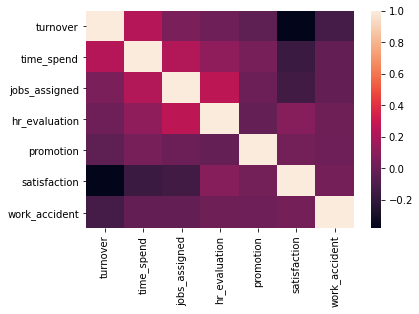

In [10]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [11]:
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.6694577284372345
The mean satisfaction for employees that had a turnover is: 0.4274552683896621


In [12]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-20.12323149053747, pvalue=1.7753490149022256e-66)

In [13]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9646914053628335
The t-distribution right quartile range is: 1.964691405362833


Text(0, 0.5, 'Employee Count')

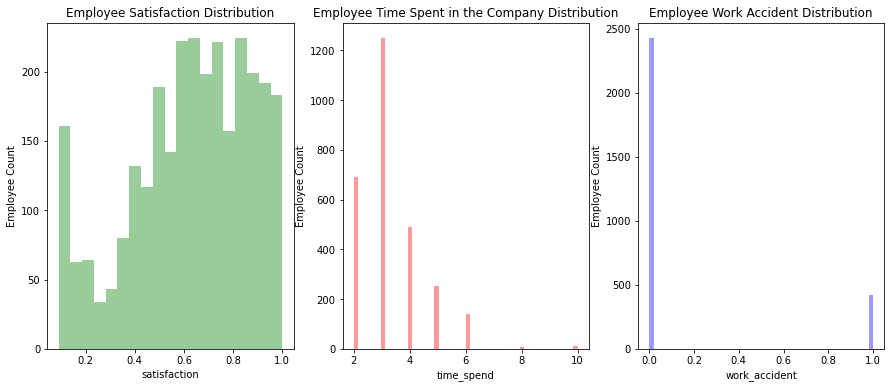

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Time Spent in the Company
sns.distplot(df.time_spend, kde=False, color="r", ax=axes[1]).set_title('Employee Time Spent in the Company Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Work Accident
sns.distplot(df.work_accident, kde=False, color="b", ax=axes[2]).set_title('Employee Work Accident Distribution')
axes[2].set_ylabel('Employee Count')

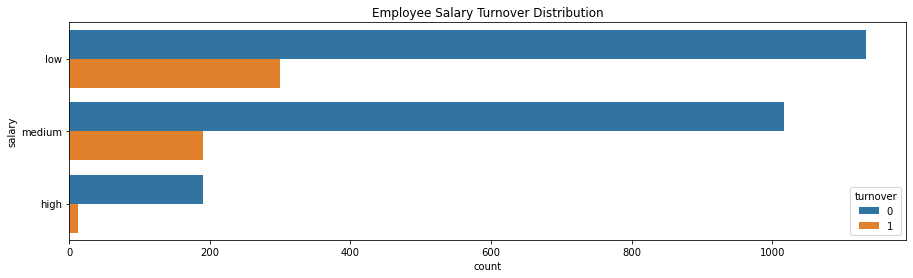

In [16]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

[Text(0, 0.5, 'Percent')]

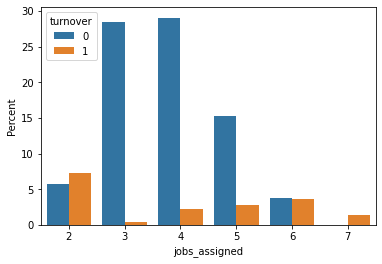

In [18]:
ax = sns.barplot(x="jobs_assigned", y="jobs_assigned", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

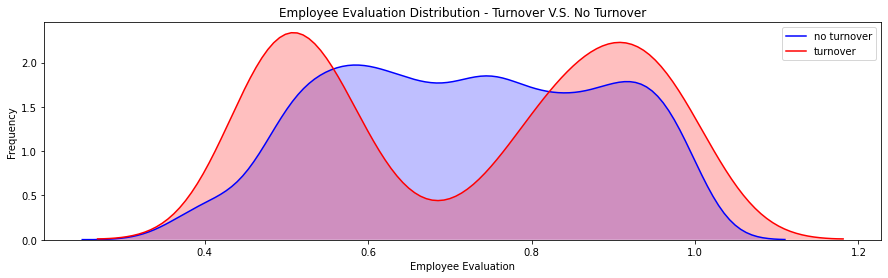

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'hr_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'hr_evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

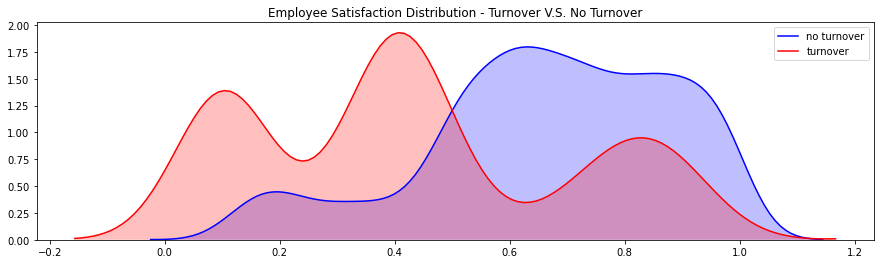

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

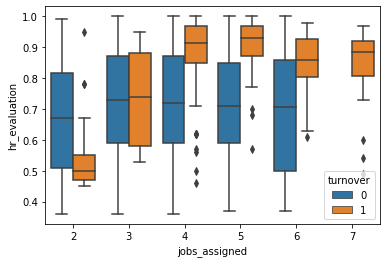

In [21]:
import seaborn as sns
sns.boxplot(x="jobs_assigned", y="hr_evaluation", hue="turnover", data=df)

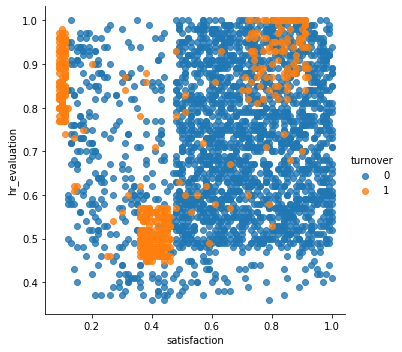

In [22]:
sns.lmplot(x='satisfaction', y='hr_evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

[Text(0, 0.5, 'Percent')]

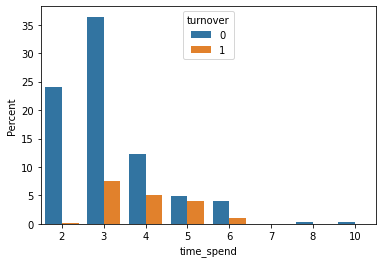

In [23]:
ax = sns.barplot(x="time_spend", y="time_spend", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

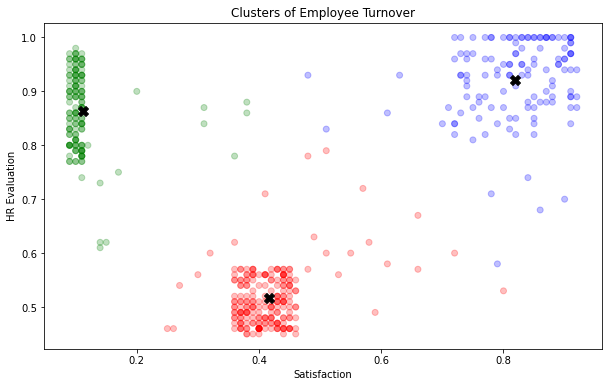

In [24]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","hr_evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="hr_evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("HR Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

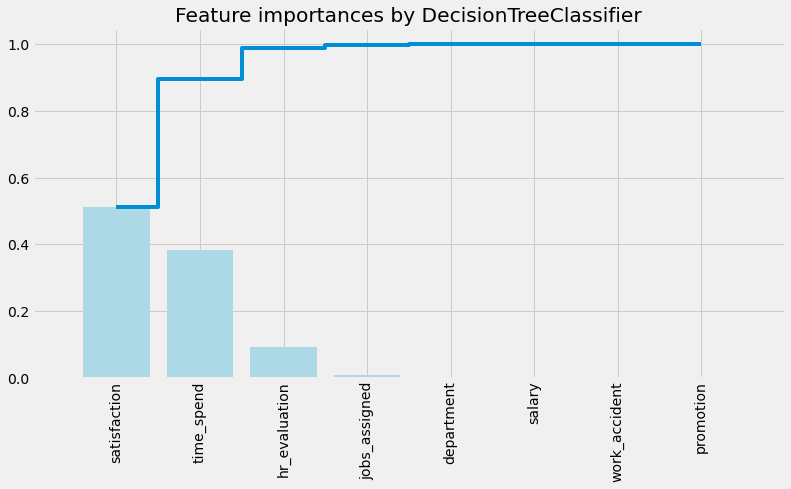

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


# Modelling Data

### Logistic Regression Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.read_csv('pelit_hr_data - Sheet2.csv')

df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

df['int'] = 1
indep_var = ['satisfaction', 'hr_evaluation', 'time_spend', 'int', 'turnover']
df = df[indep_var]

target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,satisfaction,hr_evaluation,time_spend,int
238,0.37,0.46,3,1
223,0.14,0.73,5,1
2385,0.93,0.78,4,1
271,0.37,0.49,3,1
1717,0.53,0.77,2,1


In [33]:
import statsmodels.api as sm
iv = ['satisfaction','hr_evaluation','time_spend', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.385572
         Iterations 6


satisfaction    -3.712731
hr_evaluation    0.064559
time_spend       0.360308
int             -0.771377
dtype: float64

In [36]:
coef = answer.params
def y (coef, satisfaction, hr_evaluation, time_spend) : 
    return coef[3] + coef[0]*satisfaction + coef[1]*hr_evaluation + coef[2]*time_spend

import numpy as np

# An Employee with 0.1 Satisfaction and 0.2 Evaluation and worked 1 years has a 14% chance of turnover
y1 = y(coef, 0.1, 0.2, 1)
p = np.exp(y1) / (1+np.exp(y1))
p

0.3166023702624852

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [38]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [39]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [40]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.82


In [41]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.85


In [43]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.840 (0.018)


In [44]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       352
           1       0.00      0.00      0.00        75

    accuracy                           0.82       427
   macro avg       0.41      0.50      0.45       427
weighted avg       0.68      0.82      0.74       427



 ---Logistic Model---
Logistic AUC = 0.82
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       352
           1       0.47      0.85      0.61        75

    accuracy                           0.81       427
   macro avg       0.72      0.82      0.74       427
weighted avg       0.88      0.81      0.82       427



 ---Decision Tree Model---
Decision Tree AUC = 0.93
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       352
           1       0.86      0.89      0.88        75

    accuracy                           0.96   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       352
           1       0.91      0.92      0.91        75

    accuracy                           0.97       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.97      0.97      0.97       427



 ---AdaBoost Model---
AdaBoost AUC = 0.86
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       352
           1       0.86      0.75      0.80        75

    accuracy                           0.93       427
   macro avg       0.90      0.86      0.88       427
weighted avg       0.93      0.93      0.93       427



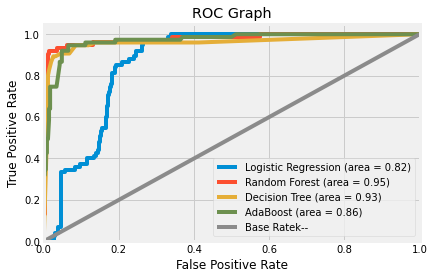

In [45]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()